# **Статистика для анализа данных**

## **Лабораторная работа №3**  
###**Бутстрап-оценки**


---


**Работу выполнили студенты :**
  - Бабич Александр Петрович, ИСУ: 412882,  Практический поток: 1.3  
  - Московкин Александр Николаевич, ИСУ: 472264,  Практический поток: 1.3  

In [1]:
import pandas as pd

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.facecolor': '#f5f5f5',
    'axes.edgecolor': '0.4'
})

# 1. **Генерация данных и базовые оценки**

## а) Сгенерируйте выборку объема N = 500 из непрерывного распределения с произвольными параметрами:

Возьмем непрерывное нормальное распределение


$$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
где $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение.

Просто сгнерируем выборку

In [4]:
mean = 5  # среднее
std_dev = 1.5  # стандартное отклонение
N = 500  # объем выборки

In [5]:
sample = np.random.normal(loc=mean, scale=std_dev, size=N)
# Генерация выборки из нормального распределения

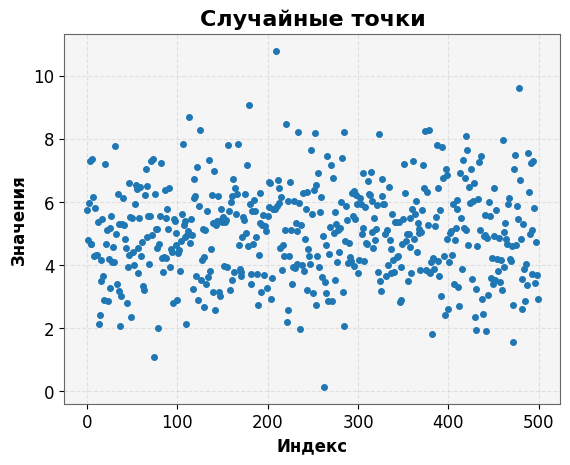

In [6]:
plt.plot(sample, 'o', markersize=4)
plt.title('Случайные точки')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.show()
# Нарисуем их

## b) Рассчитайте точечные оценки:

### Теоретическое значение среднего:
$$ X_{\text{mean}} = \frac{1}{N} \cdot \sum_{i=1}^{N} X_i $$

### Теоретическое значение медианы:
Для нормального распределения теоретическая медиана совпадает с математическим ожиданием:
$$ \text{Med} = \mu $$

### Теоретическое значение дисперсии:
$$ \sigma^2 = \frac{1}{N} \cdot \sum_{i=1}^{N} (X_i - \mu)^2 $$

### Теоретическое значение интерквартильного размаха (IQR):
Для нормального распределения:
$$ \text{IQR} = Q_3 - Q_1 $$
где:
- $Q_p$ - процентиль уровня $p$, удовлетворяющий условию:
$$ P(X \leq Q_p) = p $$
- $Q_1$ - 25-й процентиль (первый квартиль)
- $Q_3$ - 75-й процентиль (третий квартиль)

### Посчитаем точечные оценки

In [7]:
sample_mean = np.mean(sample)
sample_median = np.median(sample)
sample_variance = np.var(sample, ddof=1)
sample_iqr = np.percentile(sample, 75) - np.percentile(sample, 25)

### Теоретические оценки

In [8]:
theoretical_mean = mean
theoretical_median = mean
theoretical_variance = std_dev ** 2
theoretical_iqr = stats.norm.ppf(0.75) - stats.norm.ppf(0.25)

Выведем все это


In [9]:
print(f"Выборочное среднее: {sample_mean}, Теоретическое среднее: {theoretical_mean}")
print(f"Медиана: {sample_median}, Теоретическая медиана: {theoretical_median}")
print(f"Дисперсия: {sample_variance}, Теоретическая дисперсия: {theoretical_variance}")
print(f"Интерквартильный размах: {sample_iqr}, Теоретический IQR: {theoretical_iqr}")

Выборочное среднее: 5.010256991882971, Теоретическое среднее: 5
Медиана: 5.0191957194947765, Теоретическая медиана: 5
Дисперсия: 2.1664303547809105, Теоретическая дисперсия: 2.25
Интерквартильный размах: 2.0056359878978594, Теоретический IQR: 1.3489795003921634


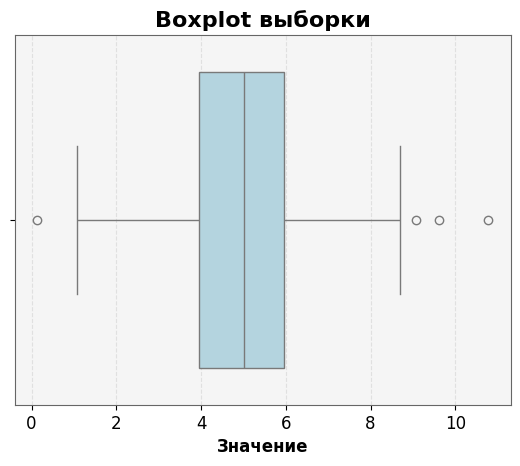

In [10]:
sns.boxplot(x=sample, color='lightblue')
plt.title('Boxplot выборки')
plt.xlabel('Значение')
plt.show()

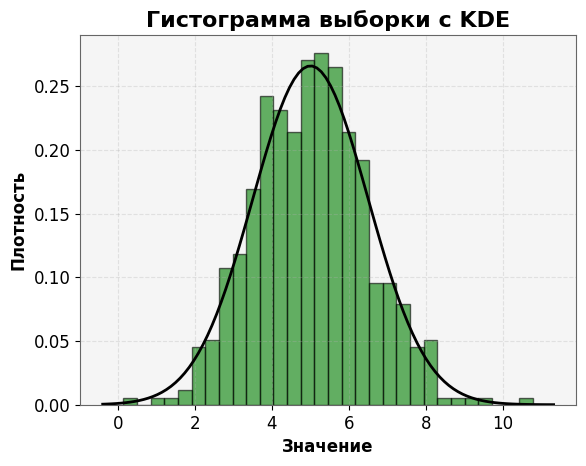

In [11]:
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g',edgecolor ='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Гистограмма выборки c KDE')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()

## c) Постройте гистограмму данных с наложением ядерной оценки плотности (KDE). Сравните KDE с гистограммой при разном числе бинов (3 значения, заданные вручную).


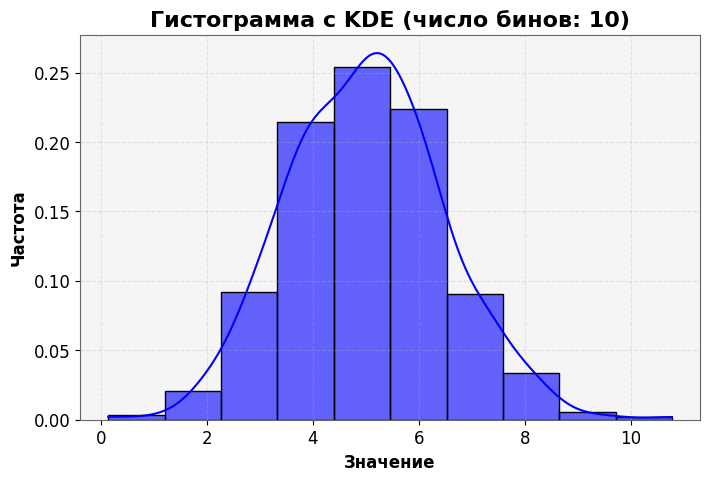

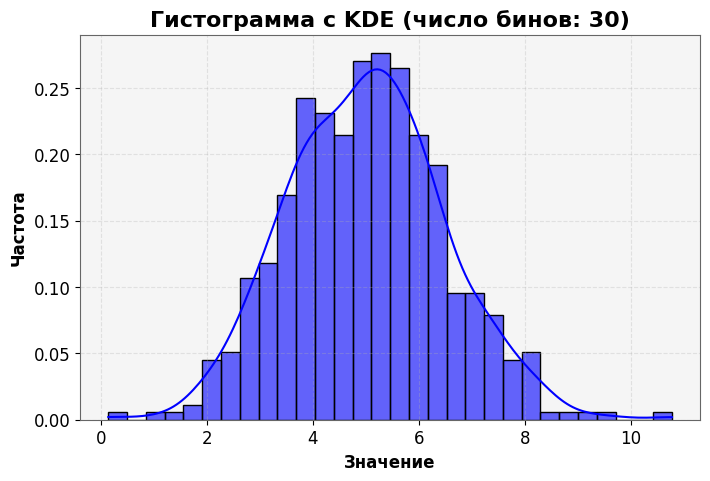

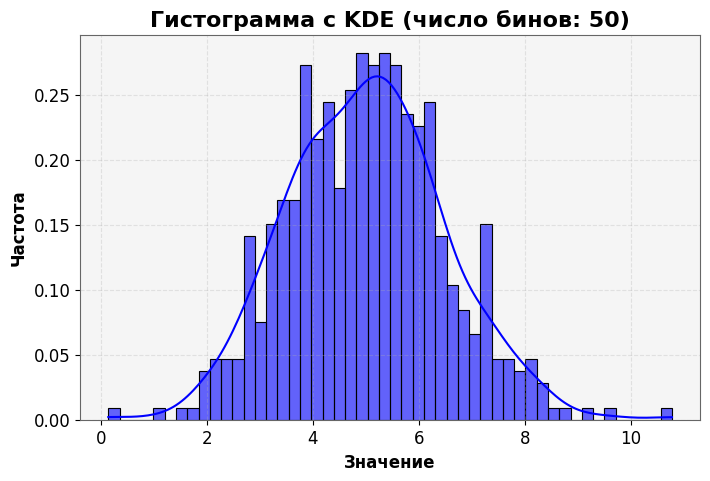

In [12]:
bin_sizes = [10, 30, 50]

for bins in bin_sizes:
    plt.figure(figsize=(8, 5))
    sns.histplot(sample, bins=bins, kde=True, color='blue', alpha=0.6, stat="density", edgecolor ='black')
    plt.title(f'Гистограмма с KDE (число бинов: {bins})')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()


# 2. Бутстрап для точечных оценок


## (a) Реализуйте алгоритм бутстрапа:
- Сгенерируйте B = 1000 бутстрап-выборок (с возвращением)
- Для каждой выборки вычислите: среднее, медиану, дисперсию, IQR

In [13]:
B = 1000

bootstrap_means = np.zeros(B)
bootstrap_medians = np.zeros(B)
bootstrap_variances = np.zeros(B)
bootstrap_iqrs = np.zeros(B)

for i in range(B):
    bootstrap_sample = np.random.choice(sample, size=N, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_medians[i] = np.median(bootstrap_sample)
    bootstrap_variances[i] = np.var(bootstrap_sample, ddof=1)
    bootstrap_iqrs[i] = np.percentile(bootstrap_sample, 75) - np.percentile(bootstrap_sample, 25)

In [14]:
bootstrap_means[:5]

array([4.95895295, 4.87885117, 4.97678134, 4.99539951, 4.89788504])

In [15]:
bootstrap_medians[:5]

array([4.98483544, 4.86060361, 5.03150576, 4.97655276, 4.88633928])

In [16]:
bootstrap_variances[:5]

array([2.18886629, 2.003152  , 2.1641598 , 2.01785266, 2.01659637])

In [17]:
bootstrap_iqrs[:5]

array([1.97040187, 1.91351659, 2.05751979, 1.91232375, 1.99538331])

## b) Постройте гистограммы распределения бутстрап-оценок для каждой статистики. Нанесите исходные оценки вертикальными линиями.

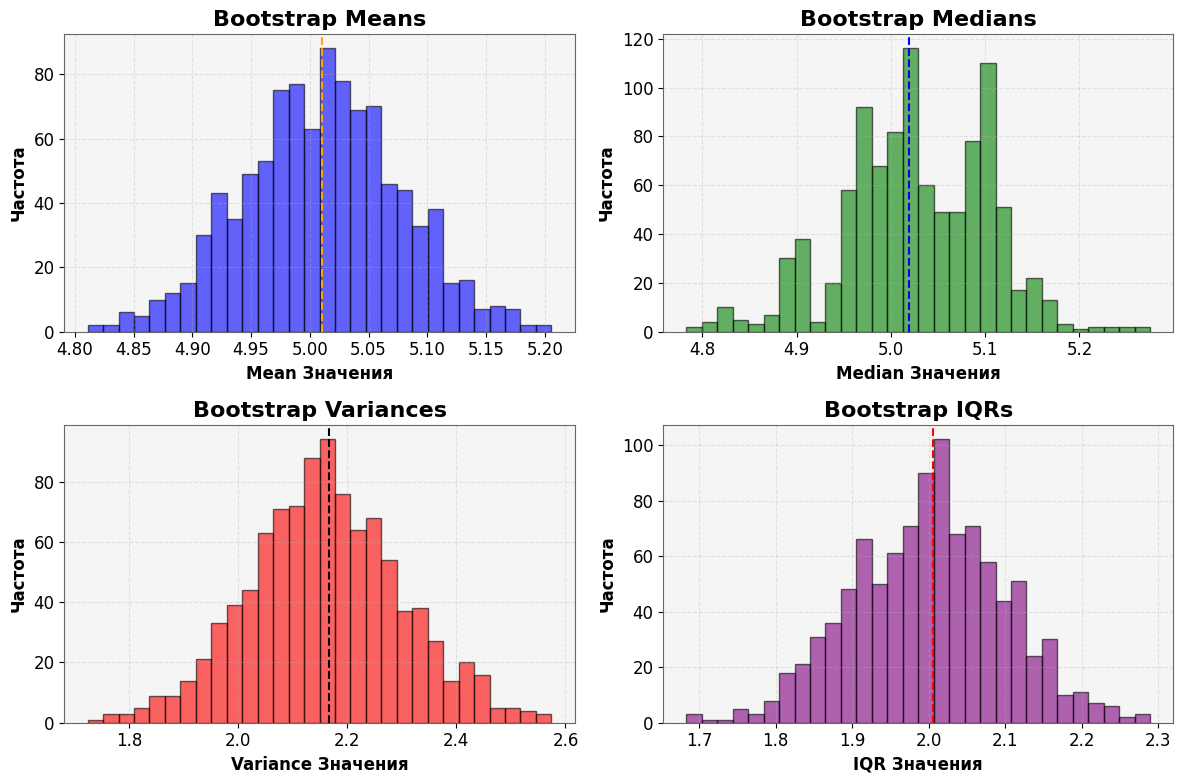

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(bootstrap_means, bins=30, color='blue', alpha=0.6, edgecolor ='black')
plt.axvline(x=sample_mean, color='orange', linestyle='--', label='Sample Mean')
plt.title('Bootstrap Means')
plt.xlabel('Mean Значения')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
plt.hist(bootstrap_medians, bins=30, color='green', alpha=0.6, edgecolor ='black')
plt.axvline(x=sample_median, color='blue', linestyle='--', label='Sample Median')
plt.title('Bootstrap Medians')
plt.xlabel('Median Значения')
plt.ylabel('Частота')

plt.subplot(2, 2, 3)
plt.hist(bootstrap_variances, bins=30, color='red', alpha=0.6, edgecolor ='black')
plt.axvline(x=sample_variance, color='black', linestyle='--', label='Sample Variance')
plt.title('Bootstrap Variances')
plt.xlabel('Variance Значения')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.hist(bootstrap_iqrs, bins=30, color='purple', alpha=0.6, edgecolor ='black')
plt.axvline(x=sample_iqr, color='red', linestyle='--', label='Sample IQR')
plt.title('Bootstrap IQRs')
plt.xlabel('IQR Значения')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# 3. Построение доверительных интервалов

## (a) Используя процентильный метод, постройте доверительные интервалы для:
- Среднего и медианы
-  Уровней доверия: 90% (α = 0.1), 95% (α = 0.05), 99% (α = 0.01)


In [19]:
def calculate_confidence_intervals(bootstrap_samples, alpha):
    lower = np.percentile(bootstrap_samples, 100 * alpha / 2)
    upper = np.percentile(bootstrap_samples, 100 * (1 - alpha / 2))
    return (lower, upper)

In [20]:
alpha_values = [0.1, 0.05, 0.01]

for alpha in alpha_values:

    ci_mean = calculate_confidence_intervals(bootstrap_means, alpha)
    ci_median = calculate_confidence_intervals(bootstrap_medians, alpha)
    ci_variance = calculate_confidence_intervals(bootstrap_variances, alpha)
    ci_iqr = calculate_confidence_intervals(bootstrap_iqrs, alpha)

    ci_dict = {
        'mean': ci_mean,
        'median': ci_median,
        'variance': ci_variance,
        'iqr': ci_iqr
    }

    sample_stats = {
        'mean': sample_mean,
        'median': sample_median,
        'variance': sample_variance,
        'iqr': sample_iqr
    }

    bootstrap_data = {
        'mean': bootstrap_means,
        'median': bootstrap_medians,
        'variance': bootstrap_variances,
        'iqr': bootstrap_iqrs
    }

    print(f"Alpha = {alpha}")
    print(f"Среднее: {ci_mean}")
    print(f"Медиана: {ci_median}")
    print(f"Дисперсия: {ci_variance}")
    print(f"IQR: {ci_iqr}")
    print("-" * 50)


Alpha = 0.1
Среднее: (np.float64(4.901550958810811), np.float64(5.119250360277191))
Медиана: (np.float64(4.891340019656725), np.float64(5.141567556146166))
Дисперсия: (np.float64(1.9350432408383638), np.float64(2.410716330754415))
IQR: (np.float64(1.8363056702879965), np.float64(2.157957248652595))
--------------------------------------------------
Alpha = 0.05
Среднее: (np.float64(4.87823958576676), np.float64(5.141690673816231))
Медиана: (np.float64(4.8663199407308175), np.float64(5.158230902395728))
Дисперсия: (np.float64(1.8732504948105861), np.float64(2.451977568336292))
IQR: (np.float64(1.8150186642343082), np.float64(2.1962062834844183))
--------------------------------------------------
Alpha = 0.01
Среднее: (np.float64(4.8424707442282084), np.float64(5.1773114799514))
Медиана: (np.float64(4.806446170127836), np.float64(5.228101661764312))
Дисперсия: (np.float64(1.7906710525952267), np.float64(2.52161858770588))
IQR: (np.float64(1.7480591165329367), np.float64(2.248363680978304

## (b) Визуализируйте интервалы для каждой статистики на отдельных графиках

In [21]:
def plot_bootstrap_intervals(alpha, ci_dict, sample_stats, bootstrap_data):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    plt.suptitle(f'Доверительные интервалы (alpha={alpha})', y=1.02)

    stats = ['mean', 'median', 'variance', 'iqr']
    titles = ['Среднее', 'Медиана', 'Дисперсия', 'IQR']
    colors = ['blue', 'green', 'red', 'purple']

    for i, (stat, title, color) in enumerate(zip(stats, titles, colors)):
        row = i // 2
        col = i % 2
        ax = axs[row, col]

        ci = ci_dict[stat]
        data = bootstrap_data[stat]
        sample_stat = sample_stats[stat]

        ax.hist(data, bins=30, color=color, alpha=0.5, density=True, edgecolor ='black')
        ax.axvline(ci[0], color='black', linestyle='--')
        ax.axvline(ci[1], color='black', linestyle='--')
        ax.axvline(sample_stat, color='red')

        ax.set_title(title)
        ax.set_xlabel('Значение')
        ax.set_ylabel('Частота')
        ax.legend()

    plt.tight_layout()
    plt.show()


<ipython-input-21-aeeeb0c79b48>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


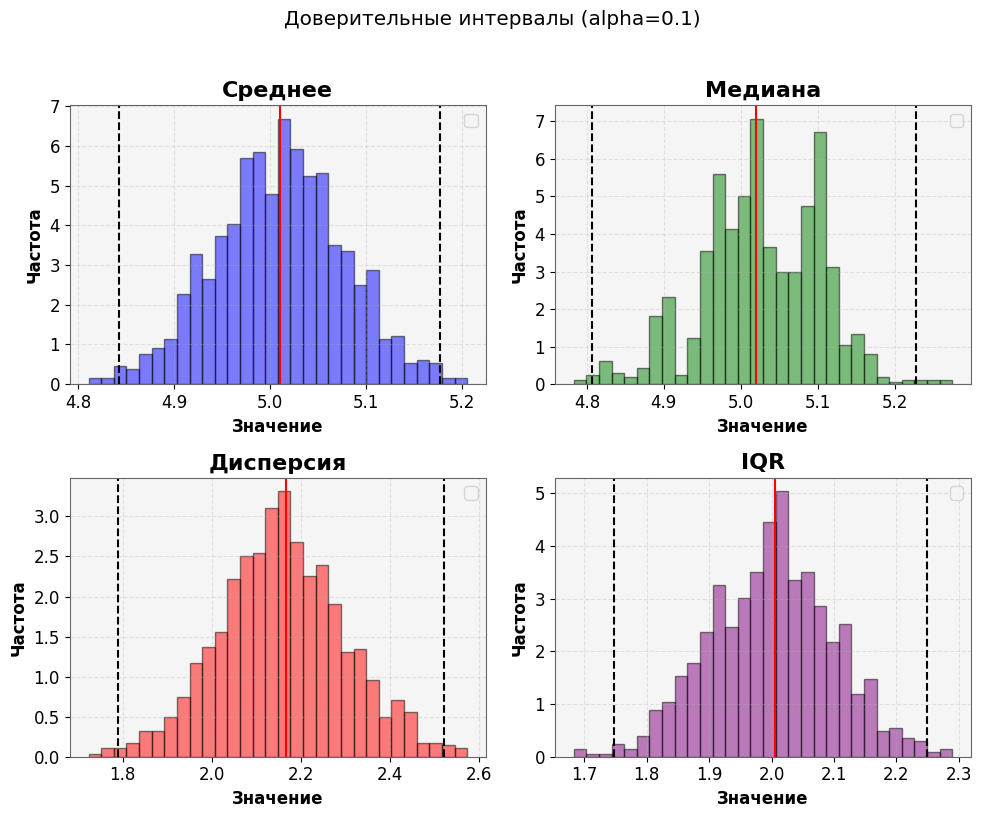

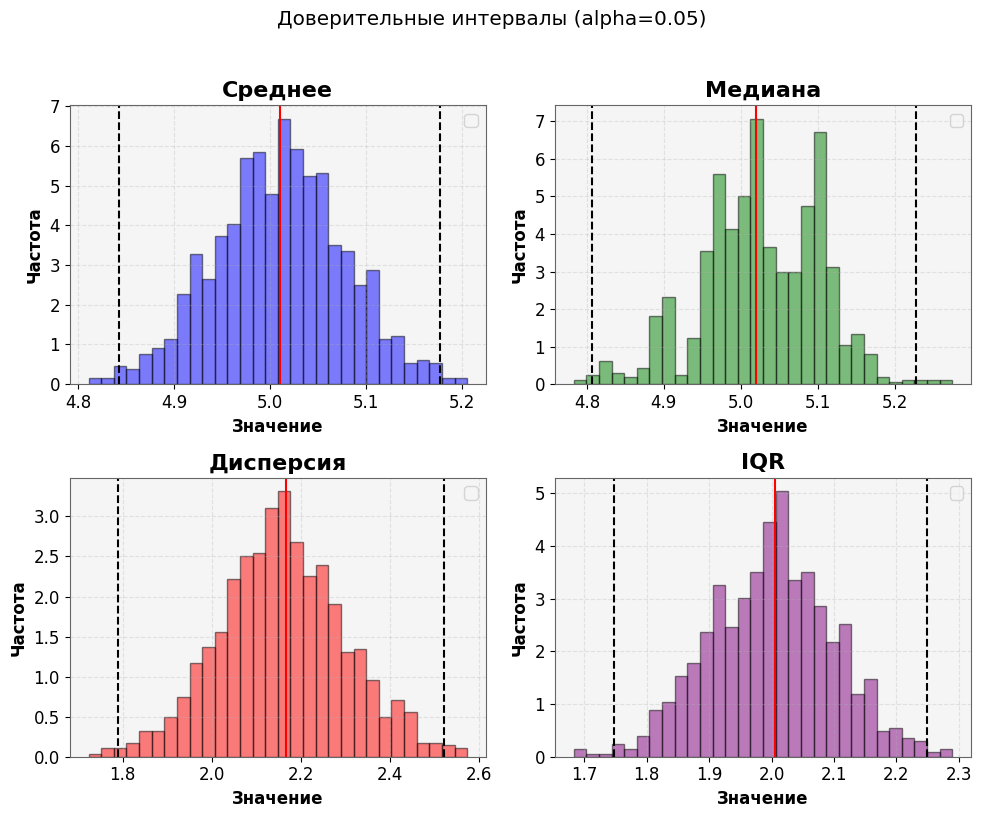

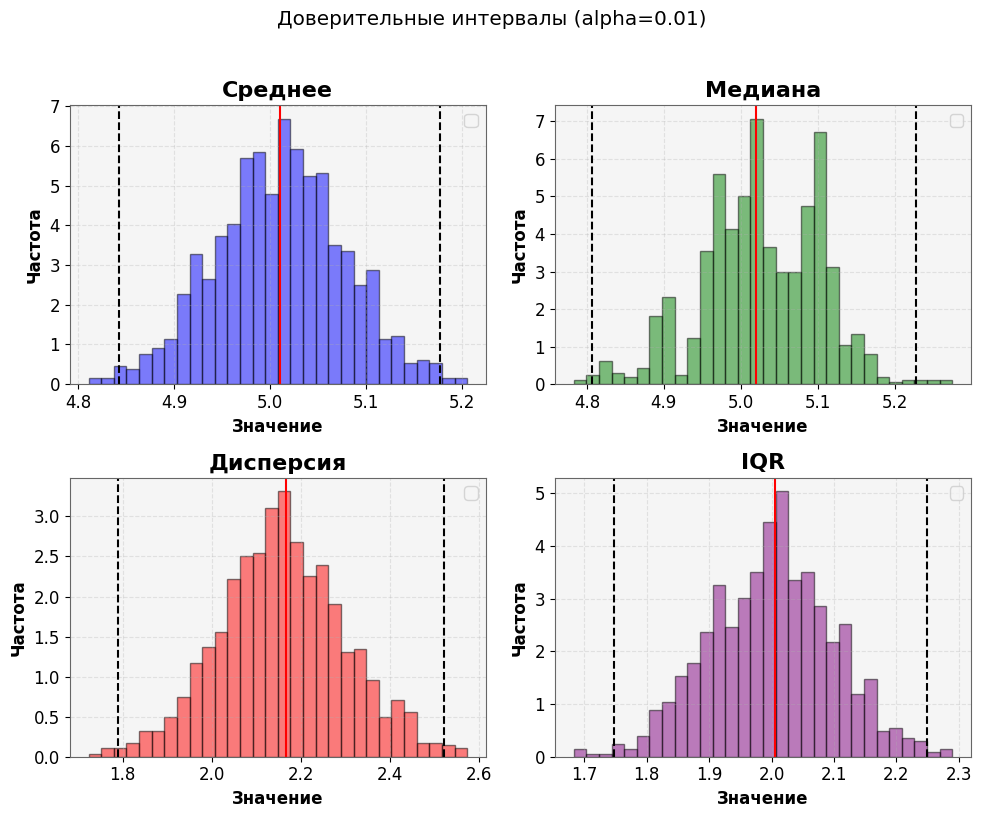

In [22]:
for alpha in alpha_values:
  plot_bootstrap_intervals(alpha, ci_dict, sample_stats, bootstrap_data)

# 4. Влияние объема выборки и числа итераций

Доверительный интервал для среднего при N=50: [4.1024267  4.85759081]
Доверительный интервал для среднего при N=100: [4.50791499 5.08349539]
Доверительный интервал для среднего при N=200: [4.95210619 5.36772781]
Доверительный интервал для среднего при N=500: [4.89340257 5.16236139]
Доверительный интервал для среднего при N=1000: [4.89029544 5.08544571]


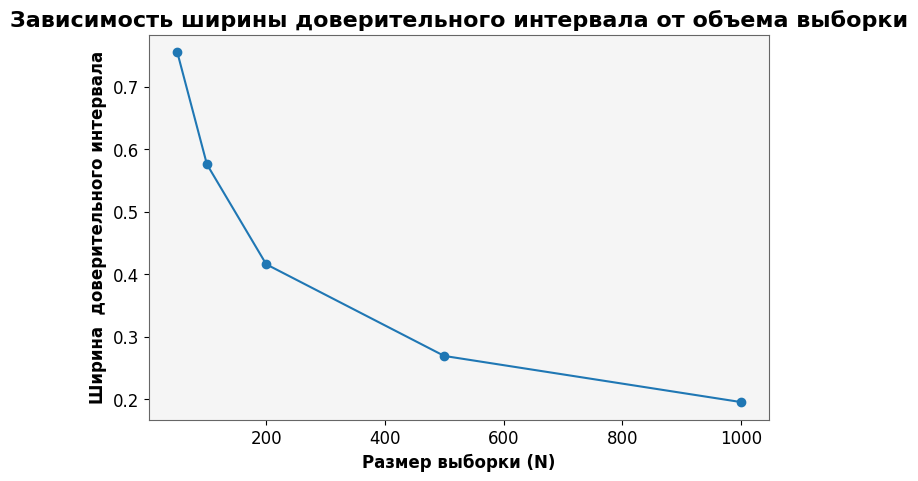

In [23]:
N_values = [50, 100, 200, 500, 1000]
interval_widths = []

for N in N_values:
    sample = np.random.normal(loc=mean, scale=std_dev, size=N)
    bootstrap_means = np.zeros(B)

    for i in range(B):
        bootstrap_sample = np.random.choice(sample, size=N, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)

    ci_mean = np.percentile(bootstrap_means, [2.5, 97.5])
    interval_widths.append(ci_mean[1] - ci_mean[0])
    print(f"Доверительный интервал для среднего при N={N}: {ci_mean}")

plt.figure(figsize=(8, 5))
plt.plot(N_values, interval_widths, marker='o')
plt.title('Зависимость ширины доверительного интервала от объема выборки')
plt.xlabel('Размер выборки (N)')
plt.ylabel('Ширина  доверительного интервала')
plt.grid()
plt.show()

Доверительный интервал для среднего при B=100: [4.92196029 5.13925654]
Доверительный интервал для среднего при B=200: [4.72672398 5.02085533]
Доверительный интервал для среднего при B=400: [4.93931144 5.19988787]
Доверительный интервал для среднего при B=1600: [5.00221707 5.27374225]
Доверительный интервал для среднего при B=3200: [4.88578904 5.14471311]


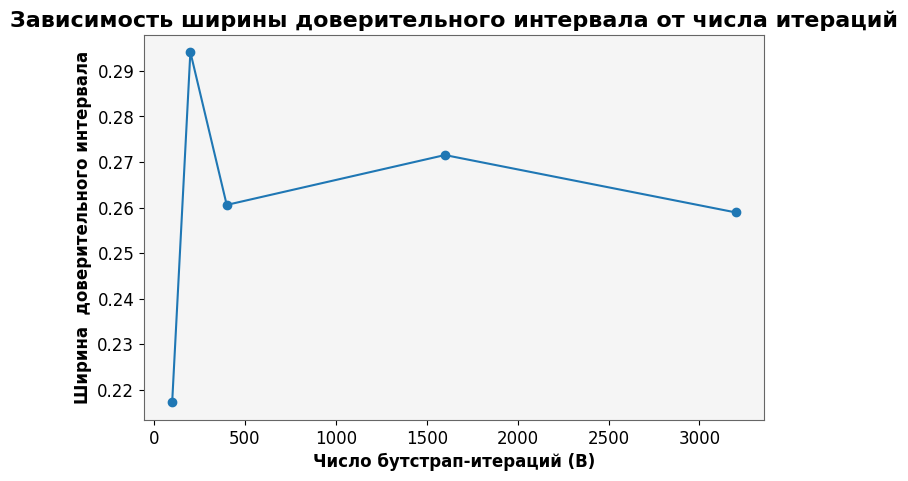

In [24]:
B_values = [100, 200, 400, 1600, 3200]
interval_widths_B = []
N = 500

for B in B_values:
    sample = np.random.normal(loc=mean, scale=std_dev, size=N)
    bootstrap_means = np.zeros(B)

    for i in range(B):
        bootstrap_sample = np.random.choice(sample, size=N, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)

    ci_mean = np.percentile(bootstrap_means, [2.5, 97.5])
    interval_widths_B.append(ci_mean[1] - ci_mean[0])
    print(f"Доверительный интервал для среднего при B={B}: {ci_mean}")

plt.figure(figsize=(8, 5))
plt.plot(B_values, interval_widths_B, marker='o')
plt.title('Зависимость ширины доверительного интервала от числа итераций')
plt.xlabel('Число бутстрап-итераций (B)')
plt.ylabel('Ширина  доверительного интервала')
plt.grid()
plt.show()

# 5. Проверка покрытия интервалов

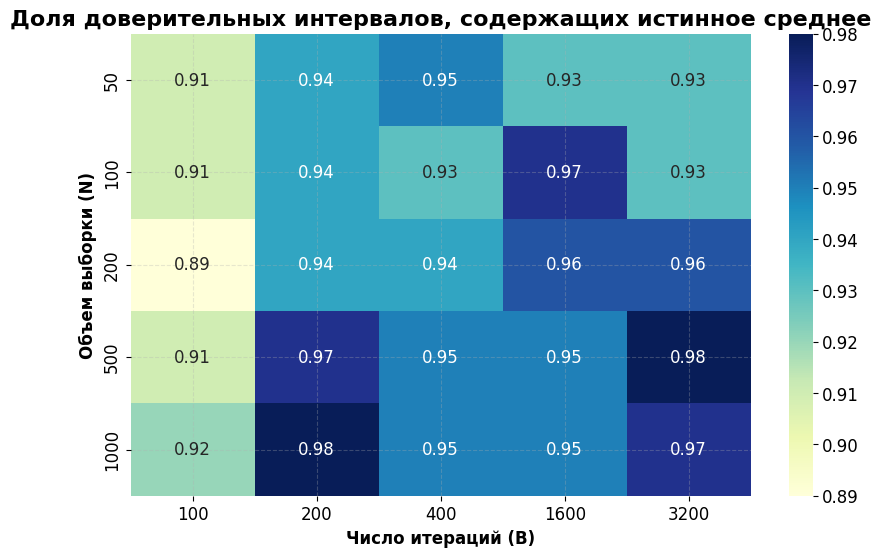

In [25]:
N_values = [50, 100, 200, 500, 1000]
B_values = [100, 200, 400, 1600, 3200]

coverage = np.zeros((len(N_values), len(B_values)))

for i in range(len(N_values)):
    for j in range(len(B_values)):
        count_coverage = 0
        for _ in range(100):
            sample = np.random.normal(loc=mean, scale=std_dev, size=N_values[i])
            bootstrap_means = np.zeros(B_values[j])

            for k in range(B_values[j]):
                bootstrap_sample = np.random.choice(sample, size=N_values[i], replace=True)
                bootstrap_means[k] = np.mean(bootstrap_sample)

            ci_mean = np.percentile(bootstrap_means, [2.5, 97.5])
            if ci_mean[0] <= mean <= ci_mean[1]:
                count_coverage += 1

        coverage[i, j] = count_coverage / 100


plt.figure(figsize=(10, 6))
sns.heatmap(coverage, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=B_values, yticklabels=N_values)
plt.title('Доля доверительных интервалов, содержащих истинное среднее')
plt.xlabel('Число итераций (B)')
plt.ylabel('Объем выборки (N)')
plt.show()

In [26]:
coverage_df = pd.DataFrame(coverage, index=N_values, columns=B_values)
coverage_df.index.name = 'Объем выборки (N)'
coverage_df.columns.name = 'Число итераций (B)'
coverage_df

Число итераций (B),100,200,400,1600,3200
Объем выборки (N),,,,,
50,0.91,0.94,0.95,0.93,0.93
100,0.91,0.94,0.93,0.97,0.93
200,0.89,0.94,0.94,0.96,0.96
500,0.91,0.97,0.95,0.95,0.98
1000,0.92,0.98,0.95,0.95,0.97
